### Importing the first dataset (math)

In [31]:
import pandas as pd
student_math=pd.read_csv('/Users/ahmadkhalilghamai/Downloads/student+performance/student/student-mat.csv',sep=';')
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Basic EDA for the Math dataset

In [34]:
student_math.shape

(395, 33)

In [36]:
student_math.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [38]:
student_math.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [40]:
student_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [42]:
student_math.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [48]:
import mysql.connector

# Connect to MySQL Server 
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Ahmad123"
)
cursor = conn.cursor()


In [51]:
# Step 1: Create the database
cursor.execute("CREATE DATABASE IF NOT EXISTS student_data")
print("✅ Database 'student_data' created or already exists.")

# Step 2: Use the database
conn.database = "student_data"

# Step 3: Create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS student_performance (
    school VARCHAR(10),
    sex VARCHAR(10),
    age INT,
    address VARCHAR(10),
    famsize VARCHAR(10),
    Pstatus VARCHAR(10),
    Medu INT,
    Fedu INT,
    Mjob VARCHAR(20),
    Fjob VARCHAR(20),
    reason VARCHAR(20),
    guardian VARCHAR(20),
    traveltime INT,
    studytime INT,
    failures INT,
    schoolsup VARCHAR(10),
    famsup VARCHAR(10),
    paid VARCHAR(10),
    activities VARCHAR(10),
    nursery VARCHAR(10),
    higher VARCHAR(10),
    internet VARCHAR(10),
    romantic VARCHAR(10),
    famrel INT,
    freetime INT,
    goout INT,
    Dalc INT,
    Walc INT,
    health INT,
    absences INT,
    G1 INT,
    G2 INT,
    G3 INT
)
"""
cursor.execute(create_table_query)
print("✅ Table 'student_performance' created successfully.")


✅ Database 'student_data' created or already exists.
✅ Table 'student_performance' created successfully.


In [53]:
cursor.execute("SELECT COUNT(*) FROM student_performance")
result = cursor.fetchone()
print(f"📊 Number of records in 'student_performance': {result[0]}")


📊 Number of records in 'student_performance': 395


In [55]:
import pandas as pd
import mysql.connector



# Step 2: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",       # Replace with your MySQL username
    password="Ahmad123",   # Replace with your MySQL password
    database="student_data"
)
cursor = conn.cursor()

# Step 3: Insert each row
for _, row in student_math.iterrows():
    sql = """
    INSERT INTO student_performance (
        school, sex, age, address, famsize, Pstatus, Medu, Fedu,
        Mjob, Fjob, reason, guardian, traveltime, studytime, failures,
        schoolsup, famsup, paid, activities, nursery, higher,
        internet, romantic, famrel, freetime, goout, Dalc,
        Walc, health, absences, G1, G2, G3
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
              %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
              %s, %s, %s, %s, %s, %s)
    """
    values = tuple(row)
    cursor.execute(sql, values)

conn.commit()
print("✅ CSV data inserted successfully.")

# Optional: Check number of rows
cursor.execute("SELECT COUNT(*) FROM student_performance")
print(f"📊 Total records: {cursor.fetchone()[0]}")


✅ CSV data inserted successfully.
📊 Total records: 790


In [57]:
print(df.columns)


NameError: name 'df' is not defined

In [59]:
cursor.execute("DELETE FROM student_performance")
conn.commit()
print("🧹 All data deleted from 'student_performance'.")


🧹 All data deleted from 'student_performance'.


In [61]:
conn.close()


In [63]:
import pandas as pd
student_por=pd.read_csv('/Users/ahmadkhalilghamai/Desktop/Final-Project/student/student-por.csv',sep=';')
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [65]:
student_por.shape

(649, 33)

In [67]:
student_por.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [69]:
student_por.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [71]:
student_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [73]:
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [75]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [77]:
import mysql.connector

# Connect to MySQL Server (not to any specific DB yet)
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Ahmad123"
)
cursor = conn.cursor()

# Step 1: Create the database
cursor.execute("CREATE DATABASE IF NOT EXISTS student_data")
print("✅ Database 'student_data' created or already exists.")

# Step 2: Use the database
conn.database = "student_data"

# Step 3: Create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS student_per_port (
    school VARCHAR(10),
    sex VARCHAR(10),
    age INT,
    address VARCHAR(10),
    famsize VARCHAR(10),
    Pstatus VARCHAR(10),
    Medu INT,
    Fedu INT,
    Mjob VARCHAR(20),
    Fjob VARCHAR(20),
    reason VARCHAR(20),
    guardian VARCHAR(20),
    traveltime INT,
    studytime INT,
    failures INT,
    schoolsup VARCHAR(10),
    famsup VARCHAR(10),
    paid VARCHAR(10),
    activities VARCHAR(10),
    nursery VARCHAR(10),
    higher VARCHAR(10),
    internet VARCHAR(10),
    romantic VARCHAR(10),
    famrel INT,
    freetime INT,
    goout INT,
    Dalc INT,
    Walc INT,
    health INT,
    absences INT,
    G1 INT,
    G2 INT,
    G3 INT
)
"""
cursor.execute(create_table_query)
print("✅ Table 'student_per_port' created successfully.")


✅ Database 'student_data' created or already exists.
✅ Table 'student_per_port' created successfully.


In [79]:
cursor.execute("SELECT COUNT(*) FROM student_per_port")
result = cursor.fetchone()
print(f"📊 Number of records in 'student_per_port': {result[0]}")

📊 Number of records in 'student_per_port': 649


In [81]:
import pandas as pd
import mysql.connector



# Step 2: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",       # Replace with your MySQL username
    password="Ahmad123",   # Replace with your MySQL password
    database="student_data"
)
cursor = conn.cursor()

# Step 3: Insert each row
for _, row in student_por.iterrows():
    sql = """
    INSERT INTO student_per_port (
        school, sex, age, address, famsize, Pstatus, Medu, Fedu,
        Mjob, Fjob, reason, guardian, traveltime, studytime, failures,
        schoolsup, famsup, paid, activities, nursery, higher,
        internet, romantic, famrel, freetime, goout, Dalc,
        Walc, health, absences, G1, G2, G3
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
              %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
              %s, %s, %s, %s, %s, %s)
    """
    values = tuple(row)
    cursor.execute(sql, values)

conn.commit()
print("✅ CSV data inserted successfully.")

# Optional: Check number of rows
cursor.execute("SELECT COUNT(*) FROM student_per_port")
print(f"📊 Total records: {cursor.fetchone()[0]}")

✅ CSV data inserted successfully.
📊 Total records: 1298


### Merging two datasets

In [85]:
merge_cols = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian"
]


In [87]:
# Merge on common demographic columns
joined_df = pd.merge(
    student_math, student_por,
    on=merge_cols,
    suffixes=('_math', '_por'),
    how='inner'  # Only students in both subjects
)


### Create Average or Unified Columns

In [90]:
# Average final grade
joined_df['G3_avg'] = (joined_df['G3_math'] + joined_df['G3_por']) / 2

# Create unified dropout label
joined_df['dropout'] = joined_df['G3_avg'].apply(lambda x: 1 if x <= 9 else 0)


In [92]:
print(joined_df.shape)
print(joined_df[['G3_math', 'G3_por', 'G3_avg', 'dropout']].head())

(383, 56)
   G3_math  G3_por  G3_avg  dropout
0        6      11     8.5        1
1        6      11     8.5        1
2       10      12    11.0        0
3       15      14    14.5        0
4       10      13    11.5        0


### Dropout Balance

dropout
0    304
1     79
Name: count, dtype: int64
dropout
0    0.793734
1    0.206266
Name: proportion, dtype: float64


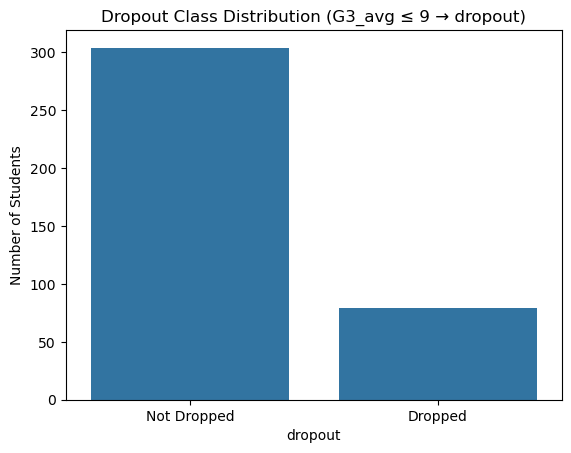

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count & percentage
print(joined_df['dropout'].value_counts())
print(joined_df['dropout'].value_counts(normalize=True))

# Plot
sns.countplot(x='dropout', data=joined_df)
plt.title("Dropout Class Distribution (G3_avg ≤ 9 → dropout)")
plt.xticks([0, 1], ['Not Dropped', 'Dropped'])
plt.ylabel("Number of Students")
plt.show()


### Correlation Analysis

dropout            1.000000
failures_math      0.363616
failures_por       0.209030
absences_por       0.173681
age                0.149866
goout_math         0.128939
goout_por          0.124561
traveltime_por     0.091858
health_math        0.081285
traveltime_math    0.077646
health_por         0.075620
freetime_por       0.060000
Dalc_math          0.055942
Dalc_por           0.055942
freetime_math      0.024939
Walc_math          0.005711
Walc_por          -0.005390
famrel_por        -0.023384
absences_math     -0.029236
famrel_math       -0.030025
studytime_math    -0.098776
studytime_por     -0.101967
Fedu              -0.142135
Medu              -0.145958
G1_por            -0.469288
G2_por            -0.481247
G3_por            -0.509749
G1_math           -0.536512
G2_math           -0.639400
G3_math           -0.748907
G3_avg            -0.751960
Name: dropout, dtype: float64


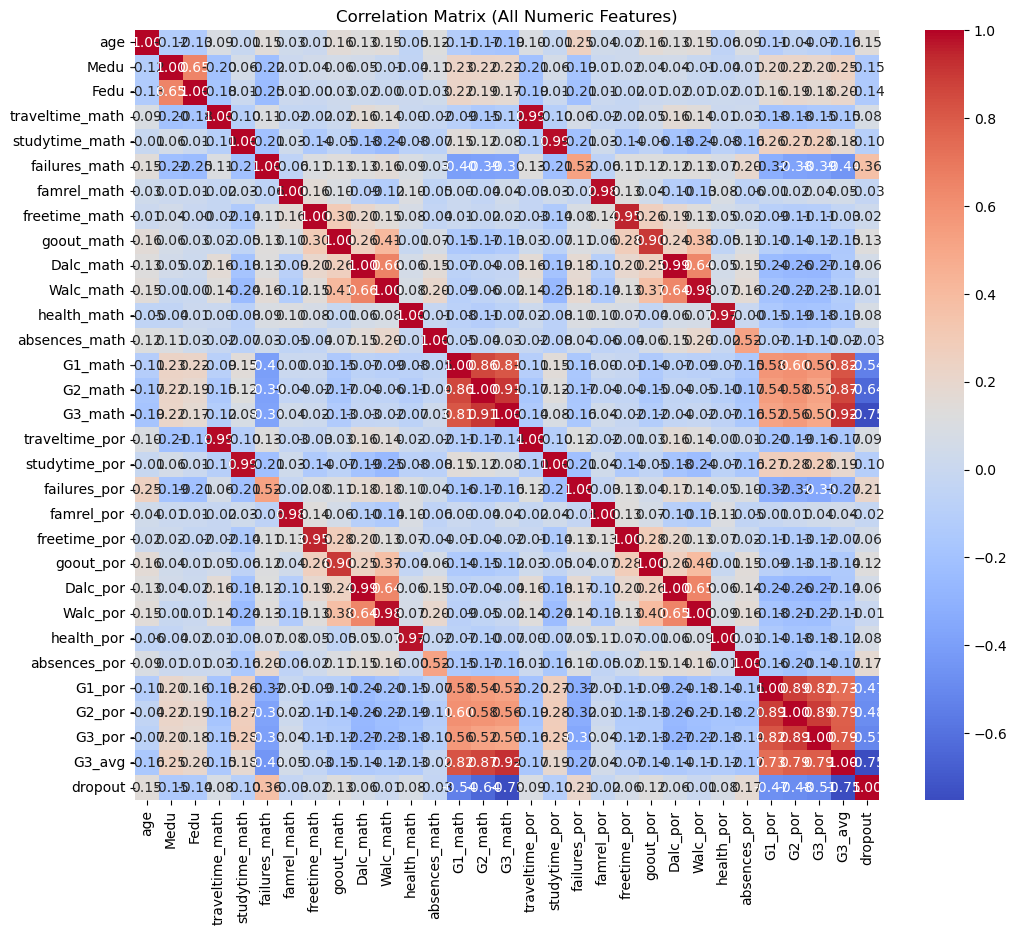

In [97]:
# Select numeric features only
numeric_cols = joined_df.select_dtypes(include='number')

# Correlation with dropout
correlations = numeric_cols.corr()['dropout'].sort_values(ascending=False)
print(correlations)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (All Numeric Features)")
plt.show()


### Categorical vs Dropout

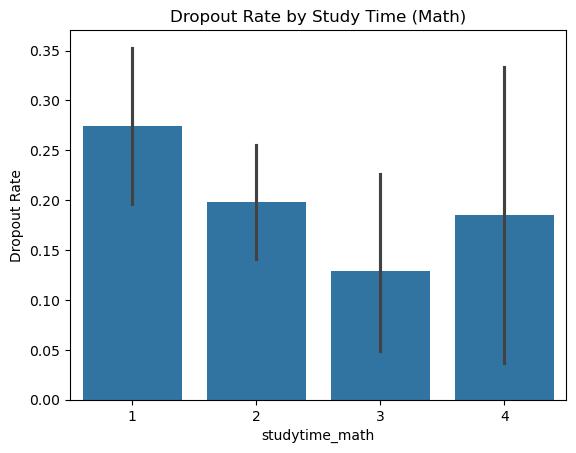

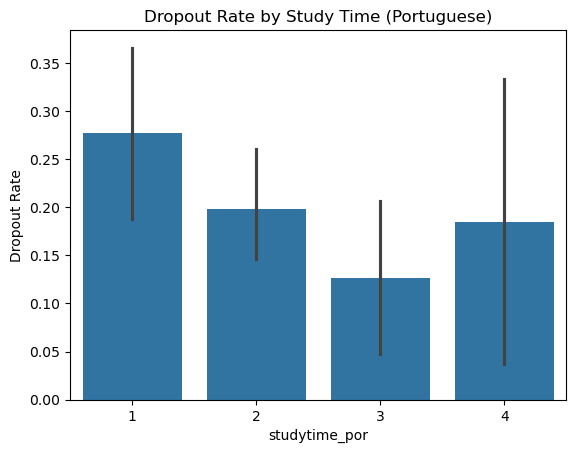

In [99]:
# A. Dropout Rate by studytime_math and studytime_por
#. 📉 Low Study Time ⟹ Higher Dropout Risk
#What to look for:

#Students with studytime = 1 (less than 2 hours/week) often show higher dropout rates.
#Could be due to poor time management, lack of motivation, or external responsibilities.
#EDA Clue:


#Takeaway: Promote study skills, after-class support, or parental involvement.
# Bar plots for studytime

sns.barplot(x='studytime_math', y='dropout', data=joined_df)
plt.title('Dropout Rate by Study Time (Math)')
plt.ylabel('Dropout Rate')
plt.show()

sns.barplot(x='studytime_por', y='dropout', data=joined_df)
plt.title('Dropout Rate by Study Time (Portuguese)')
plt.ylabel('Dropout Rate')
plt.show()


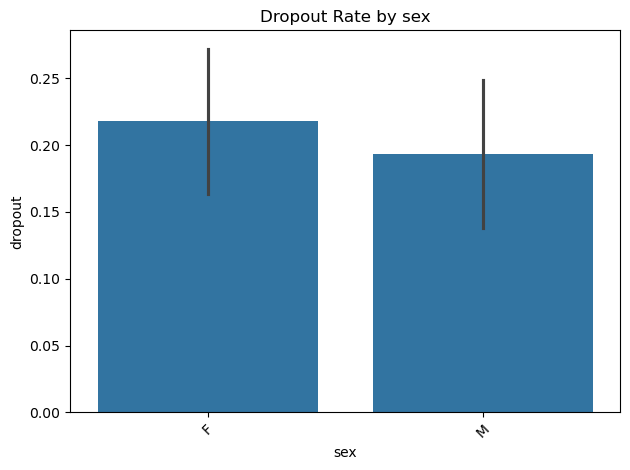

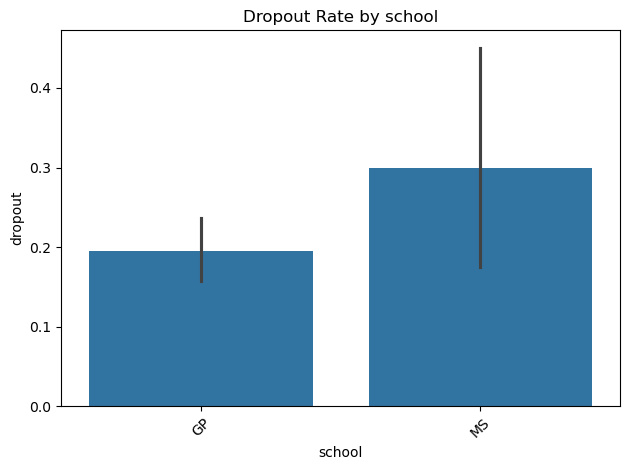

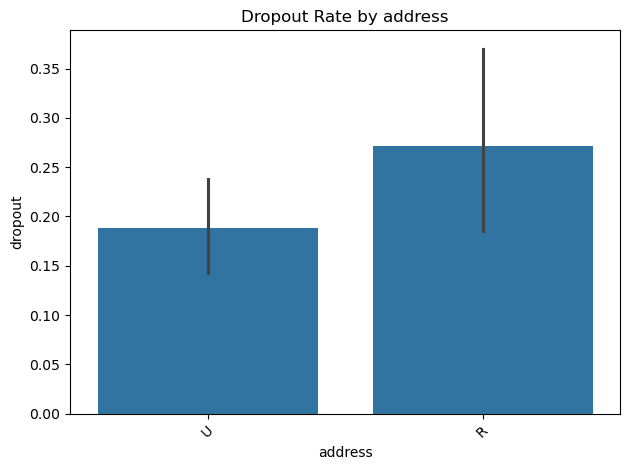

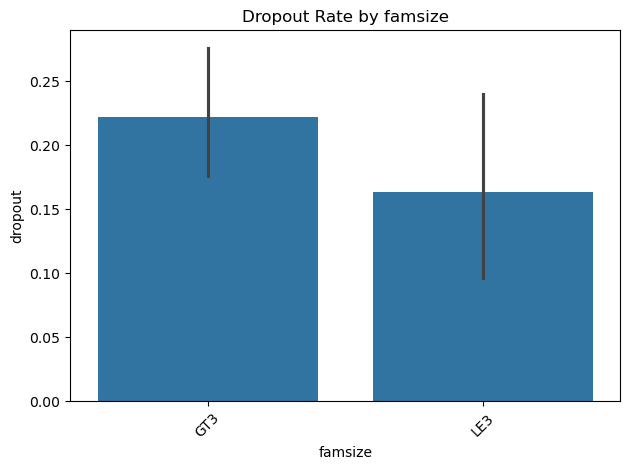

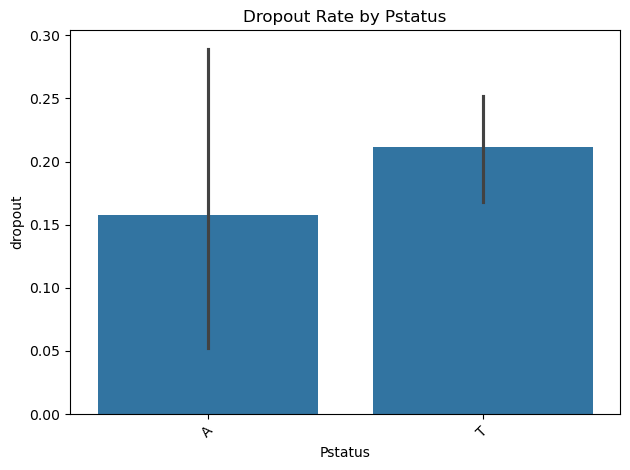

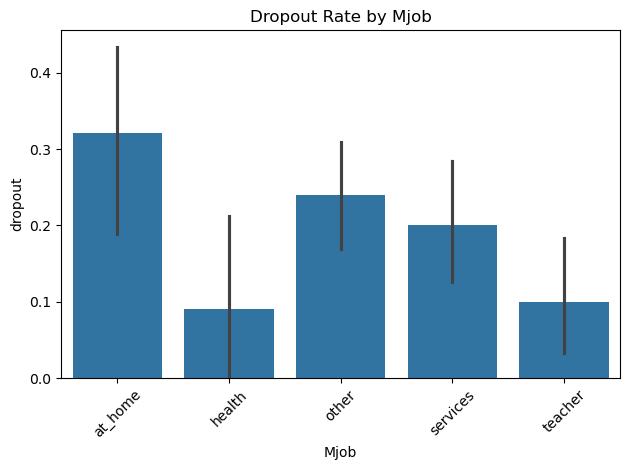

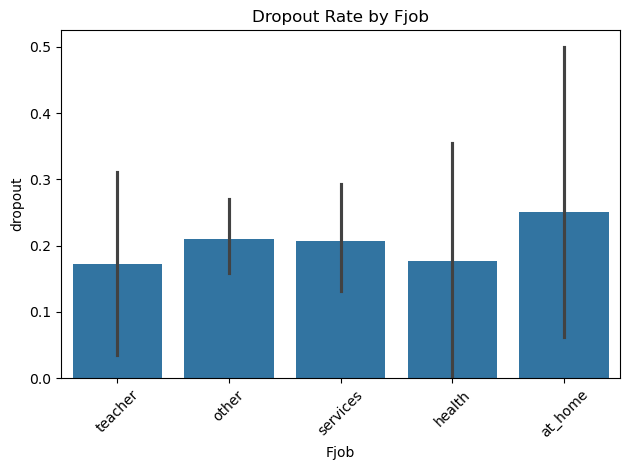

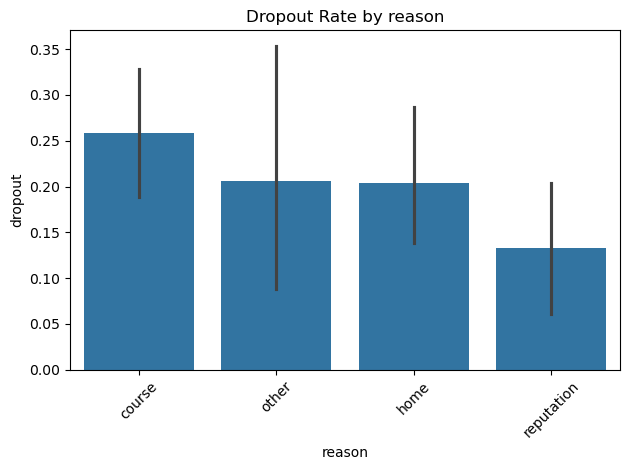

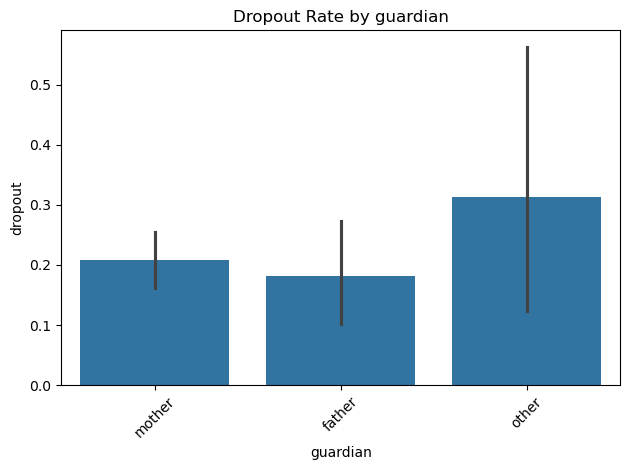

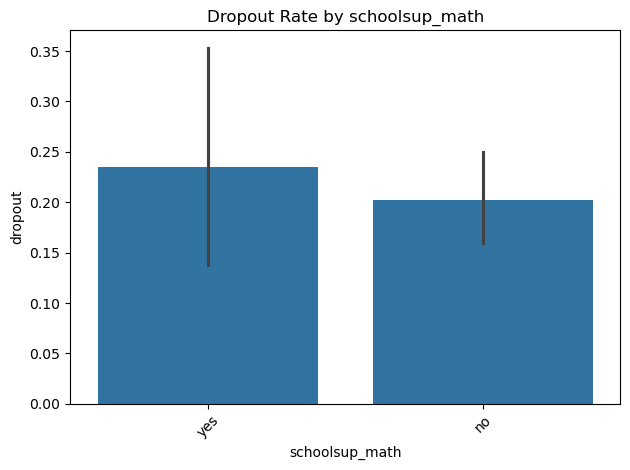

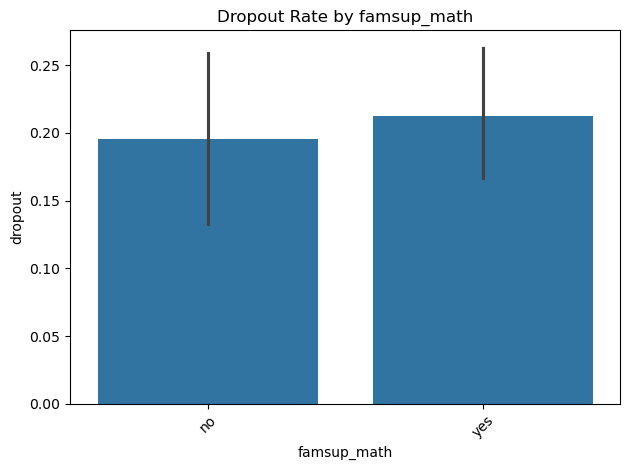

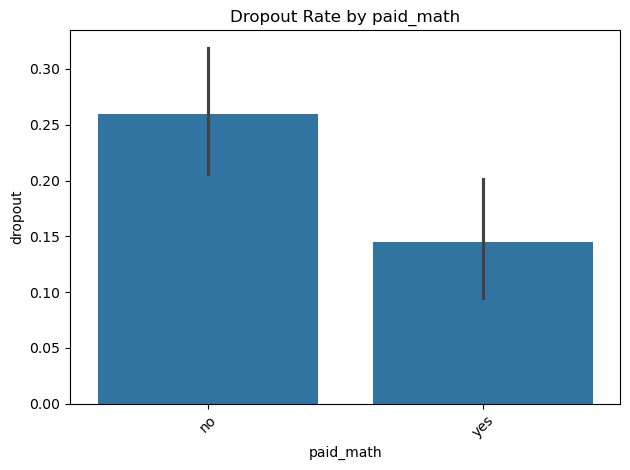

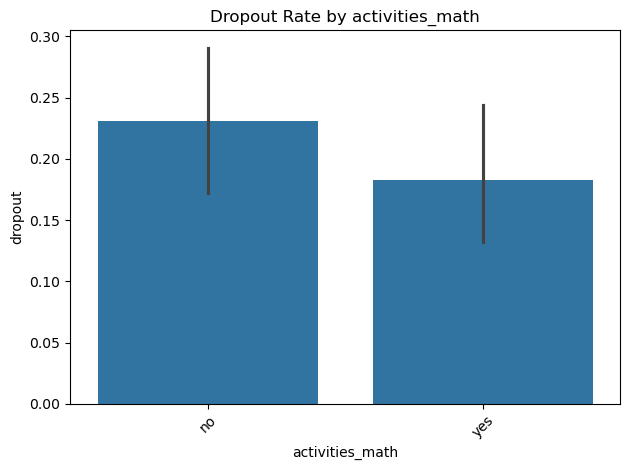

In [100]:
#B. Loop Through All Categorical Features
#Here’s a loop to check multiple categorical variables:
categorical_features = [
    'sex', 'school', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup_math', 'famsup_math', 'paid_math',
    'activities_math', 'nursery', 'internet'
]

for col in categorical_features:
    if col in joined_df.columns:
        sns.barplot(x=col, y='dropout', data=joined_df)
        plt.title(f'Dropout Rate by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### 🥃 1. Alcohol Consumption vs Grades and Dropout

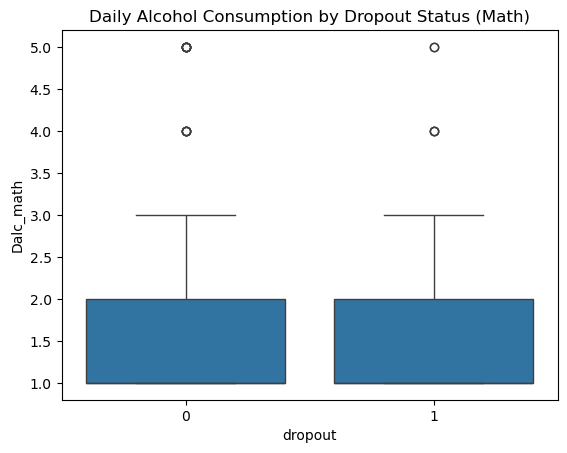

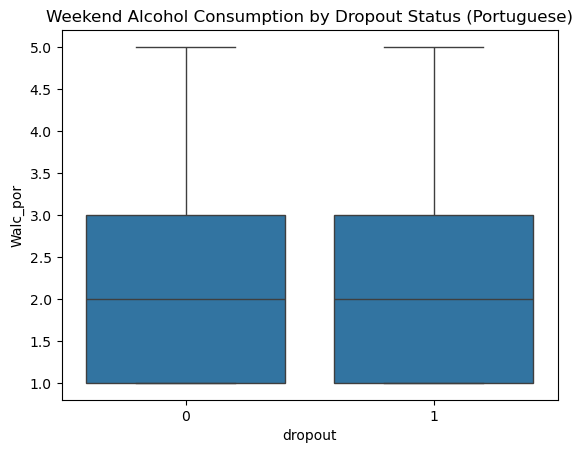

           Dalc_math  Walc_math   G3_math
Dalc_math   1.000000   0.655589 -0.031789
Walc_math   0.655589   1.000000 -0.023644
G3_math    -0.031789  -0.023644  1.000000
          Dalc_por  Walc_por    G3_por
Dalc_por  1.000000  0.650703 -0.268346
Walc_por  0.650703  1.000000 -0.221403
G3_por   -0.268346 -0.221403  1.000000


In [102]:
# Compare Dalc and Walc across dropout and grades
import seaborn as sns
import matplotlib.pyplot as plt

# Alcohol vs G3_avg
sns.boxplot(x='dropout', y='Dalc_math', data=joined_df)
plt.title("Daily Alcohol Consumption by Dropout Status (Math)")
plt.show()

sns.boxplot(x='dropout', y='Walc_por', data=joined_df)
plt.title("Weekend Alcohol Consumption by Dropout Status (Portuguese)")
plt.show()

# Correlation with grades
print(joined_df[['Dalc_math', 'Walc_math', 'G3_math']].corr())
print(joined_df[['Dalc_por', 'Walc_por', 'G3_por']].corr())


### 📉 2. Absences vs Dropout

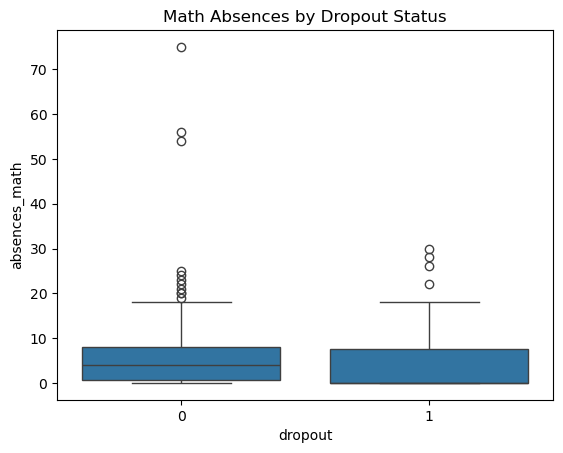

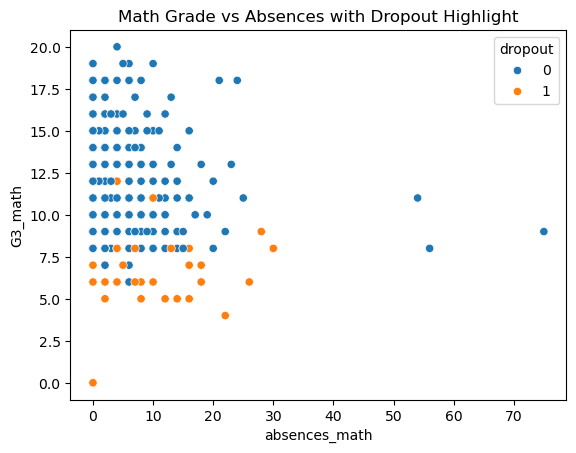

In [105]:
sns.boxplot(x='dropout', y='absences_math', data=joined_df)
plt.title("Math Absences by Dropout Status")
plt.show()

sns.scatterplot(x='absences_math', y='G3_math', hue='dropout', data=joined_df)
plt.title("Math Grade vs Absences with Dropout Highlight")
plt.show()


### 🚻 3. Compare Dropout Trends by Gender

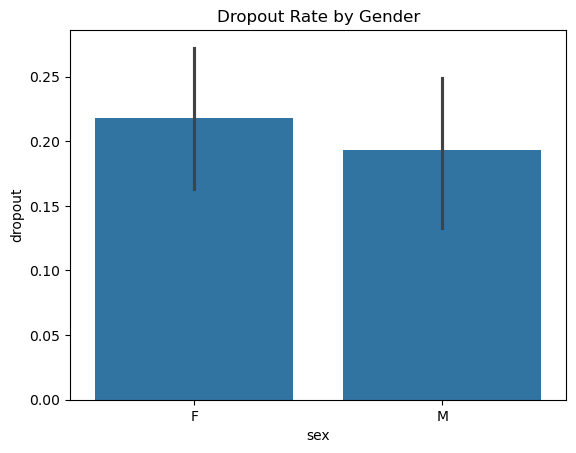

In [108]:
sns.barplot(x='sex', y='dropout', data=joined_df)
plt.title("Dropout Rate by Gender")
plt.show()
#Insight: You'll likely see:

#High absences → lower grades
#Lower grades → more dropouts

### 4. Composite Risk Score (Simple Heuristic)

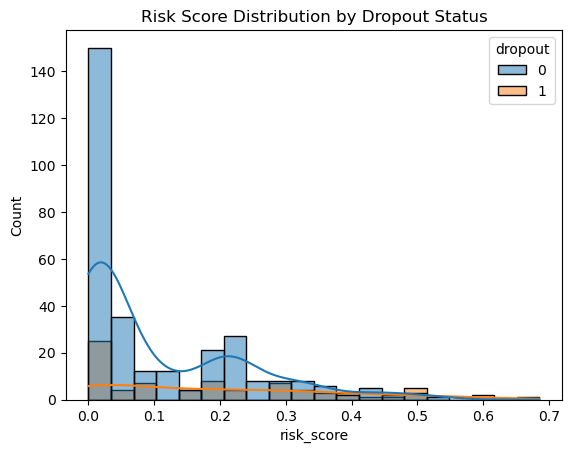

In [111]:
#Insight: A well-tuned risk score can help flag students for early intervention.
# Normalize key risk factors
joined_df['absences_norm'] = joined_df['absences_math'] / joined_df['absences_math'].max()
joined_df['failures_norm'] = joined_df['failures_math'] / joined_df['failures_math'].max()
joined_df['low_studytime'] = joined_df['studytime_math'].apply(lambda x: 1 if x == 1 else 0)
joined_df['high_dalc'] = joined_df['Dalc_math'].apply(lambda x: 1 if x >= 3 else 0)

# Composite risk score (weights are illustrative)
joined_df['risk_score'] = (
    0.4 * joined_df['absences_norm'] +
    0.3 * joined_df['failures_norm'] +
    0.2 * joined_df['low_studytime'] +
    0.1 * joined_df['high_dalc']
)

# Inspect relationship
sns.histplot(data=joined_df, x='risk_score', hue='dropout', bins=20, kde=True)
plt.title("Risk Score Distribution by Dropout Status")
plt.show()

# Optional: flag high-risk students
joined_df['high_risk'] = joined_df['risk_score'].apply(lambda x: 1 if x > 0.5 else 0)


### Grade Distribution by Gender & Parental Education

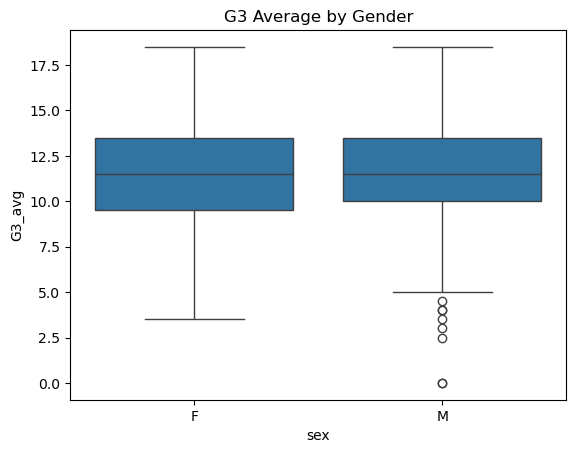

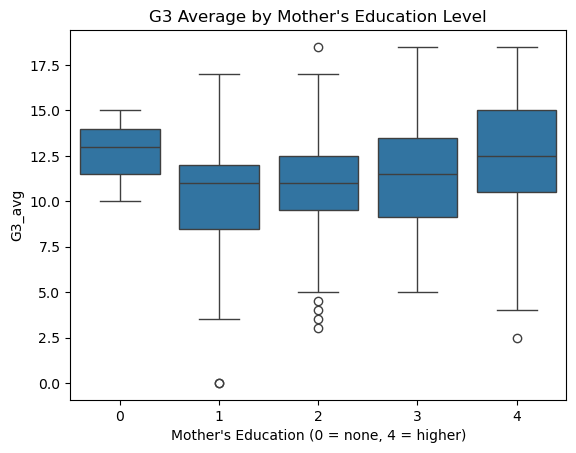

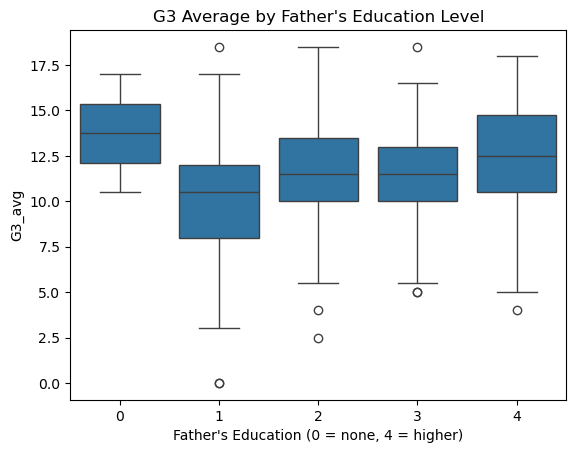

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender vs G3_avg
sns.boxplot(x='sex', y='G3_avg', data=joined_df)
plt.title("G3 Average by Gender")
plt.show()

# Mother's education vs G3_avg
sns.boxplot(x='Medu', y='G3_avg', data=joined_df)
plt.title("G3 Average by Mother's Education Level")
plt.xlabel("Mother's Education (0 = none, 4 = higher)")
plt.show()

# Father's education vs G3_avg
sns.boxplot(x='Fedu', y='G3_avg', data=joined_df)
plt.title("G3 Average by Father's Education Level")
plt.xlabel("Father's Education (0 = none, 4 = higher)")
plt.show()


## Dropout Rates by Alcohol Use & Absence

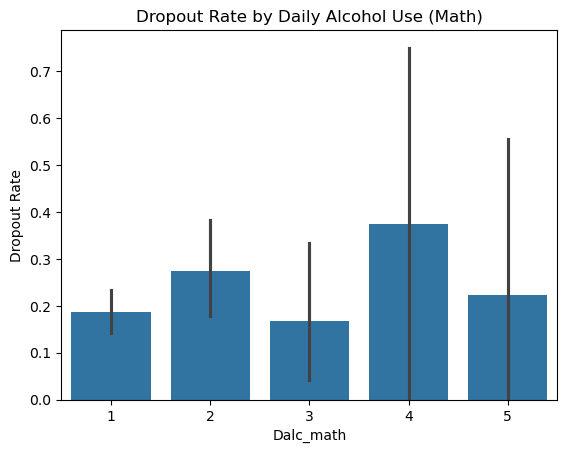

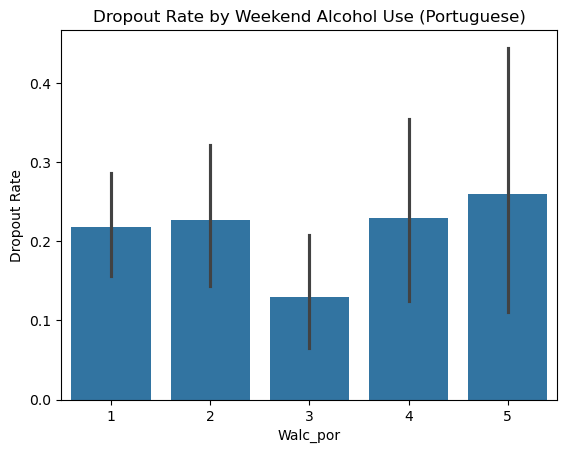

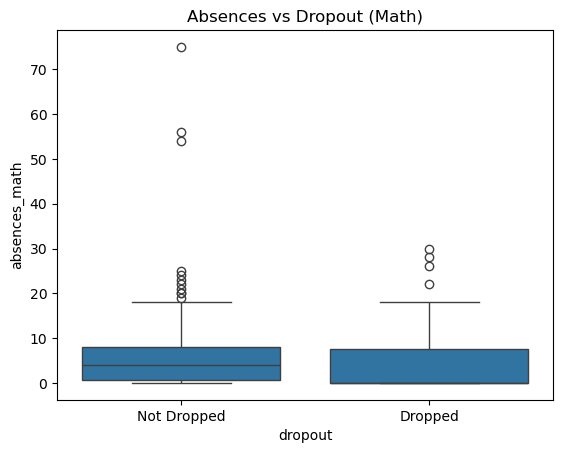

In [117]:
# Daily alcohol use vs dropout
sns.barplot(x='Dalc_math', y='dropout', data=joined_df)
plt.title("Dropout Rate by Daily Alcohol Use (Math)")
plt.ylabel("Dropout Rate")
plt.show()

# Weekly alcohol use vs dropout
sns.barplot(x='Walc_por', y='dropout', data=joined_df)
plt.title("Dropout Rate by Weekend Alcohol Use (Portuguese)")
plt.ylabel("Dropout Rate")
plt.show()

# Absences vs dropout
sns.boxplot(x='dropout', y='absences_math', data=joined_df)
plt.title("Absences vs Dropout (Math)")
plt.xticks([0, 1], ['Not Dropped', 'Dropped'])
plt.show()


### Boxplot: G3 vs Study Time

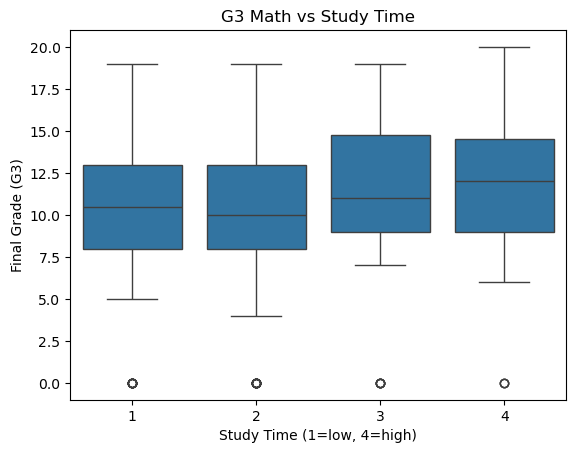

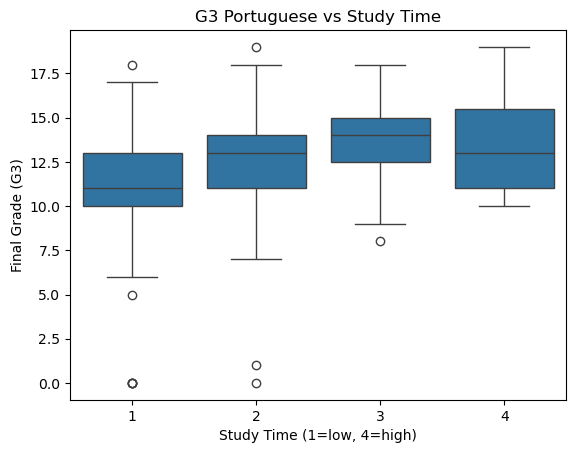

In [122]:
# Math
sns.boxplot(x='studytime_math', y='G3_math', data=joined_df)
plt.title("G3 Math vs Study Time")
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Final Grade (G3)")
plt.show()

# Portuguese
sns.boxplot(x='studytime_por', y='G3_por', data=joined_df)
plt.title("G3 Portuguese vs Study Time")
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Final Grade (G3)")
plt.show()


# KPI

#### Average Grade per Subject or Group

In [127]:
#BY subject
# Already present as G3_math, G3_por, and G3_avg
joined_df['avg_grade'] = joined_df[['G3_math', 'G3_por']].mean(axis=1)


In [130]:
# By Group (Optional: if you want average grade by gender, etc.)
# Example: average grade by gender (add as new column for lookup)
gender_avg = joined_df.groupby('sex')['avg_grade'].transform('mean')
joined_df['gender_avg_grade'] = gender_avg


### At-Risk Student (Custom Rule)
Define your own risk threshold, for example:

G3_avg < 10
or low studytime, high failures, etc.

In [133]:
# Simple grade-based rule
joined_df['at_risk'] = joined_df['G3_avg'].apply(lambda x: 1 if x < 10 else 0)


In [135]:
joined_df['risk_score'] = (
    0.4 * (joined_df['absences_math'] / joined_df['absences_math'].max()) +
    0.3 * (joined_df['failures_math'] / joined_df['failures_math'].max()) +
    0.2 * joined_df['studytime_math'].apply(lambda x: 1 if x == 1 else 0) +
    0.1 * joined_df['Dalc_math'].apply(lambda x: 1 if x >= 3 else 0)
)

joined_df['at_risk_custom'] = joined_df['risk_score'].apply(lambda x: 1 if x > 0.5 else 0)


### Pass/Fail Status Column

In [138]:
joined_df['passed'] = joined_df['G3_avg'].apply(lambda x: 1 if x >= 10 else 0)


###  Pass Rate by Key Features (Optional as Grouped Data)

In [141]:
support_pass = joined_df.groupby('schoolsup_math')['passed'].mean().reset_index()
print(support_pass)


  schoolsup_math    passed
0             no  0.750000
1            yes  0.686275


 #### Pass Rate by Mother’s Education:

In [144]:
medu_pass = joined_df.groupby('Medu')['passed'].mean().reset_index()
print(medu_pass)


   Medu    passed
0     0  1.000000
1     1  0.607843
2     2  0.715686
3     3  0.691489
4     4  0.842105


In [146]:
joined_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime_math',
       'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math',
       'paid_math', 'activities_math', 'nursery_math', 'higher_math',
       'internet_math', 'romantic_math', 'famrel_math', 'freetime_math',
       'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math',
       'G1_math', 'G2_math', 'G3_math', 'traveltime_por', 'studytime_por',
       'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por',
       'activities_por', 'nursery_por', 'higher_por', 'internet_por',
       'romantic_por', 'famrel_por', 'freetime_por', 'goout_por', 'Dalc_por',
       'Walc_por', 'health_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por',
       'G3_avg', 'dropout', 'absences_norm', 'failures_norm', 'low_studytime',
       'high_dalc', 'risk_score', 'high_risk', 'avg_grade', 'gender_avg_grade',
       'at_risk', 'at_risk_custo

In [148]:
#If we didn't disambiguate column names during the join (e.g., suffixes=('_math', '_por')), some columns may have duplicates or overrides. To keep data clean:

# When merging:
common_columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
]

joined_df = pd.merge(
    student_math,
    student_por,
    on=common_columns,
    suffixes=('_math', '_por')
)


In [150]:
import os

# Get path to user's desktop
desktop = os.path.join(os.path.expanduser("~"), "Desktop")

# Full path to output file
output_path = os.path.join(desktop, "joined_student_data.csv")

# Save to CSV
joined_df.to_csv(output_path, index=False)

print(f"File saved to: {output_path}")


File saved to: /Users/ahmadkhalilghamai/Desktop/joined_student_data.csv


### 🧪 H1: Students with Low Study Time Are More Likely to Drop Out
##### Null (H0): Study time has no effect on dropout.
##### Alternative (H1): Students with lower study time are more likely to drop out.

In [158]:
# df is your joined student‑performance DataFrame
joined_df['G3_avg'] = (joined_df['G3_math'] + joined_df['G3_por']) / 2

# Optional check
print(joined_df[['G3_math', 'G3_por', 'G3_avg']].head())

   G3_math  G3_por  G3_avg
0        6      11     8.5
1        6      11     8.5
2       10      12    11.0
3       15      14    14.5
4       10      13    11.5


In [160]:
import pandas as pd

# df is your joined student-performance DataFrame
# 1) If you already have G3_avg
joined_df['dropout_flag'] = (joined_df['G3_avg'] < 10).astype(int)

# 2) If you *don’t* yet have G3_avg, calculate it first:
# df['G3_avg'] = (df['G3_math'] + df['G3_por']) / 2
# df['dropout_flag'] = (df['G3_avg'] < 10).astype(int)

# Quick check
print(joined_df[['G3_avg', 'dropout_flag']].head())
print(joined_df['dropout_flag'].value_counts())


   G3_avg  dropout_flag
0     8.5             1
1     8.5             1
2    11.0             0
3    14.5             0
4    11.5             0
dropout_flag
0    284
1     99
Name: count, dtype: int64


In [164]:
import pandas as pd
from scipy.stats import chi2_contingency

# df already contains `studytime_math` (1‑4), `G3_avg`, and `dropout_flag`

# 1 = "<2 hours/week", 2‑4 = higher study times
joined_df['study_low'] = (joined_df['studytime_math'] == 1).astype(int)


In [166]:
# 2×2 table: rows = low / high study, columns = dropout vs stay
table = pd.crosstab(joined_df['study_low'], joined_df['dropout_flag'])
print("Contingency table\n", table)


Contingency table
 dropout_flag    0   1
study_low            
0             212  69
1              72  30


In [168]:
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi² = {chi2:.2f},  p‑value = {p:.4f},  dof = {dof}")


Chi² = 0.68,  p‑value = 0.4079,  dof = 1


### Interpretation
### Because the p‑value (≈ 0.41) is far above the typical α‑level of 0.05, we fail to reject the null hypothesis.

### Conclusion: In this sample, there is no statistically significant evidence that students with low study time (< 2 hours / week) drop out more often than students who study longer. Any difference you see in raw percentages is likely due to random variation.


### 🧪 H2: Weekend Alcohol Use Affects Academic Performance
##### Null (H0): Weekend alcohol use has no effect on final grades.
##### Alternative (H1): Higher Walc is associated with lower G3_avg.
Variables:
Walc (1 to 5)
G3_avg

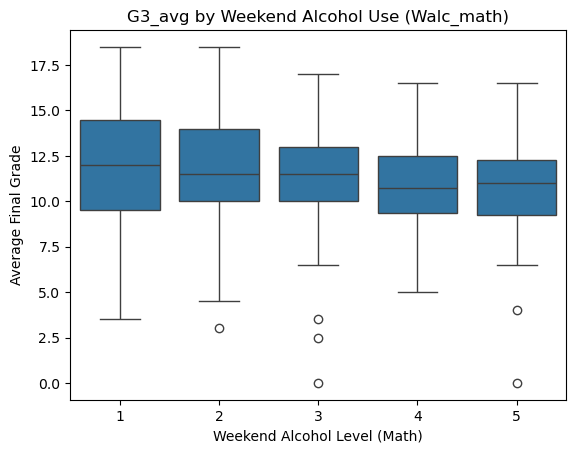

ANOVA  F = 1.68   p‑value = 0.1550
Spearman ρ = -0.117   p = 0.0216


In [179]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# ── 1. Quick box/violin plot ──────────────────────────────────────────
sns.boxplot(x='Walc_math', y='G3_avg', data=joined_df)
plt.title('G3_avg by Weekend Alcohol Use (Walc_math)')
plt.xlabel('Weekend Alcohol Level (Math)')
plt.ylabel('Average Final Grade')
plt.show()

# ── 2. One‑way ANOVA ──────────────────────────────────────────────────
groups = [grp['G3_avg'].values for name, grp in joined_df.groupby('Walc_math')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA  F = {f_stat:.2f}   p‑value = {p_val:.4f}")

# ── 3. Spearman correlation (optional check) ──────────────────────────
rho, spearman_p = stats.spearmanr(joined_df['Walc_math'], joined_df['G3_avg'])
print(f"Spearman ρ = {rho:.3f}   p = {spearman_p:.4f}")


### 🧠 Interpretation
#### ANOVA Result:
#### The p-value > 0.05 → We fail to reject the null hypothesis. This means there's no strong evidence that group means (i.e., grades across Walc levels) are significantly different.

#### Spearman Correlation:
#### The correlation is weak but negative and statistically significant (ρ = –0.117, p < 0.05).
#### This suggests a slight tendency: as weekend alcohol use increases, average grades tend to decrease.

### 🧩 Conclusion
#### While the group difference (via ANOVA) isn't significant, the correlation shows some weak evidence that students with higher alcohol consumption may perform slightly worse.


#### There is a weak but statistically significant negative correlation between weekend alcohol use and academic performance, although group-level differences are not strong.”

In [193]:
import pandas as pd

# Calculate math performance
math_avg = round(joined_df['G3_math'].mean(), 2)
math_pass_rate = round((joined_df['G3_math'] >= 10).sum() / joined_df['G3_math'].count() * 100, 2)
math_fail_rate = round((joined_df['G3_math'] < 10).sum() / joined_df['G3_math'].count() * 100, 2)

# Calculate Portuguese performance
por_avg = round(joined_df['G3_por'].mean(), 2)
por_pass_rate = round((joined_df['G3_por'] >= 10).sum() / joined_df['G3_por'].count() * 100, 2)
por_fail_rate = round((joined_df['G3_por'] < 10).sum() / joined_df['G3_por'].count() * 100, 2)

# Combine results
performance_df = pd.DataFrame({
    'Subject': ['Math', 'Portuguese'],
    'Average Grade': [math_avg, por_avg],
    'Pass Rate (%)': [math_pass_rate, por_pass_rate],
    'Fail Rate (%)': [math_fail_rate, por_fail_rate]
})

performance_df


,Subject,Average Grade,Pass Rate (%),Fail Rate (%)
0,Math,10.35,66.06,33.94
1,Portuguese,12.51,91.64,8.36
